Przygotowanie danych:
Dane o nowotworach piersi:

In [4]:
from sklearn import datasets
data_breast_cancer = datasets.load_breast_cancer(return_X_y= True, as_frame=True)

Dane o irysach:

In [5]:
data_iris = datasets.load_iris(return_X_y= True, as_frame=True)

Klasyfikacja zbioru breast cancer:

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

bc_data = data_breast_cancer[0]
bc_target = data_breast_cancer[1]

bc_train_x, bc_test_x, bc_train_y, bc_test_y = train_test_split(bc_data, bc_target, test_size=0.2, random_state=42)

In [7]:
bc_area_smooth_train = pd.DataFrame({"mean area" : bc_train_x["mean area"], "mean smoothness" : bc_train_x["mean smoothness"]})
bc_area_smooth_test = pd.DataFrame({"mean area" : bc_test_x["mean area"], "mean smoothness" : bc_test_x["mean smoothness"]})
bc_area_smooth_x = pd.DataFrame({"mean area" : bc_data["mean area"], "mean smoothness" : bc_data["mean smoothness"]})

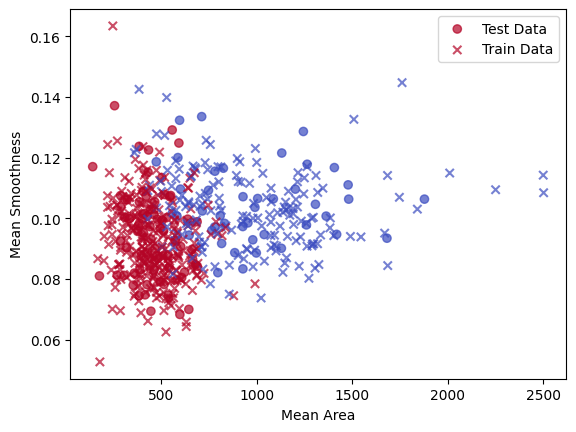

In [8]:
from matplotlib import pyplot as plt 

plt.scatter(bc_area_smooth_test["mean area"], bc_area_smooth_test["mean smoothness"], c=bc_test_y, cmap="coolwarm", alpha=0.7, label="Test Data")
plt.scatter(bc_area_smooth_train["mean area"], bc_area_smooth_train["mean smoothness"], c=bc_train_y, cmap="coolwarm", alpha=0.7, marker="x", label="Train Data")

plt.xlabel("Mean Area")
plt.ylabel("Mean Smoothness")
plt.legend()
plt.show()

Model bez skalowania:

Sprawdzanie najlepszych parametrów bo nie przechodzi przez sprawdzarkę przy domyślnych:

In [9]:
from sklearn.discriminant_analysis import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

bc_svm_2 = Pipeline([
    ("classifier", LinearSVC(loss="hinge"))
])

param_grid = {
    "classifier__C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "classifier__max_iter": [1000, 5000, 10000]
}

search = RandomizedSearchCV(
    estimator=bc_svm_2,
    param_distributions=param_grid,
    scoring="accuracy",
    cv=5,
    random_state=42
)
search.fit(bc_area_smooth_x, bc_target)
print(search.best_params_, search.best_score_)


c:\Users\User\OneDrive\Dokumenty\Machine-Learning\venv\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\User\OneDrive\Dokumenty\Machine-Learning\venv\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\User\OneDrive\Dokumenty\Machine-Learning\venv\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\User\OneDrive\Dokumenty\Machine-Learning\venv\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\User\OneDrive\Dokumenty\Machine-Learning\venv\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warni

{'classifier__max_iter': 10000, 'classifier__C': 0.01} 0.8366092221704704


c:\Users\User\OneDrive\Dokumenty\Machine-Learning\venv\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\User\OneDrive\Dokumenty\Machine-Learning\venv\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\User\OneDrive\Dokumenty\Machine-Learning\venv\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\User\OneDrive\Dokumenty\Machine-Learning\venv\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [10]:
bc_svm = LinearSVC(loss='hinge', C=0.01, max_iter=10000, random_state=26)
bc_svm.fit(bc_area_smooth_train, bc_train_y)

c:\Users\User\OneDrive\Dokumenty\Machine-Learning\venv\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=0.01, loss='hinge', max_iter=10000, random_state=26)

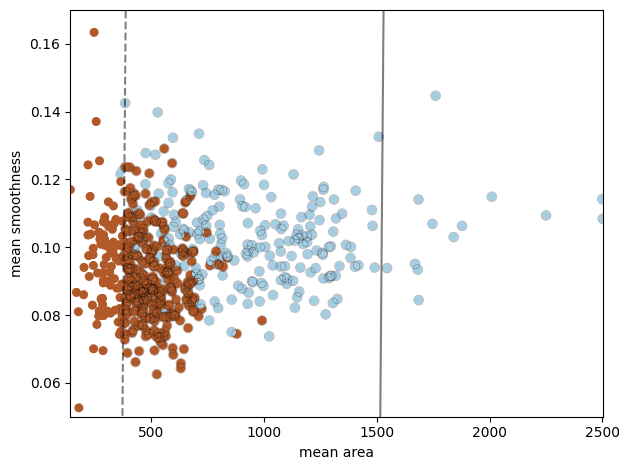

In [11]:
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt
import numpy as np

decision_function = bc_svm.decision_function(bc_area_smooth_x)
support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)[0]
support_vectors = bc_area_smooth_x.iloc[support_vector_indices]
plt.scatter(bc_area_smooth_x.iloc[:, 0], bc_area_smooth_x.iloc[:, 1], c=bc_target, s=30, cmap=plt.cm.Paired)
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    bc_svm,
    bc_area_smooth_x,
    ax=ax,
    grid_resolution=50,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
)
plt.scatter(
    support_vectors.iloc[:, 0],
    support_vectors.iloc[:, 1],
    s=50,
    linewidth=0.5,
    facecolors="none",
    edgecolors="k",
    alpha=0.3
)
plt.ylim(0.05, 0.17)
plt.tight_layout()
plt.show()


Model po uprzednim skalowaniu:

Sprawdzanie najlepszych parametrów bo nie przechodzi przez sprawdzarkę przy domyślnych:

In [12]:
bc_svm_scaled_2 = Pipeline([
    ("scaler", StandardScaler()),
    ("classifier", LinearSVC(loss="hinge"))
])

search_scaled = RandomizedSearchCV(
    estimator=bc_svm_scaled_2,
    param_distributions=param_grid,
    scoring="accuracy",
    cv=5,
    random_state=42
)

search_scaled.fit(bc_area_smooth_x, bc_target)
print(search_scaled.best_params_, search_scaled.best_score_)


c:\Users\User\OneDrive\Dokumenty\Machine-Learning\venv\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\User\OneDrive\Dokumenty\Machine-Learning\venv\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\User\OneDrive\Dokumenty\Machine-Learning\venv\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\User\OneDrive\Dokumenty\Machine-Learning\venv\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\User\OneDrive\Dokumenty\Machine-Learning\venv\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warni

{'classifier__max_iter': 10000, 'classifier__C': 1} 0.8998447446048751


c:\Users\User\OneDrive\Dokumenty\Machine-Learning\venv\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\User\OneDrive\Dokumenty\Machine-Learning\venv\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\User\OneDrive\Dokumenty\Machine-Learning\venv\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\User\OneDrive\Dokumenty\Machine-Learning\venv\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

bc_svm_scaled = Pipeline( [ 
    ("scaler" , StandardScaler()),
    ("linear_svm" , LinearSVC(loss='hinge', C=1000, max_iter=5000, random_state=26)),
])

bc_svm_scaled.fit(bc_area_smooth_train, bc_train_y)

c:\Users\User\OneDrive\Dokumenty\Machine-Learning\venv\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svm',
                 LinearSVC(C=1000, loss='hinge', max_iter=5000,
                           random_state=26))])

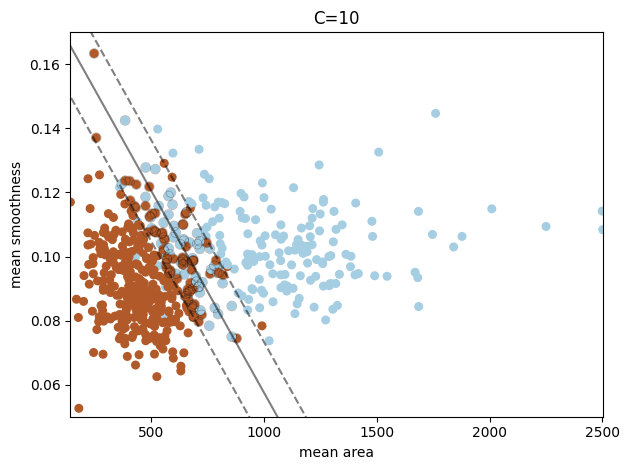

In [14]:
decision_function = bc_svm_scaled.decision_function(bc_area_smooth_x)
support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)[0]
support_vectors = bc_area_smooth_x.iloc[support_vector_indices]
plt.scatter(bc_area_smooth_x.iloc[:, 0], bc_area_smooth_x.iloc[:, 1], c=bc_target, s=30, cmap=plt.cm.Paired)
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    bc_svm_scaled,
    bc_area_smooth_x,
    ax=ax,
    grid_resolution=50,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
)
plt.scatter(
    support_vectors.iloc[:, 0],
    support_vectors.iloc[:, 1],
    s=50,
    linewidth=0.5,
    facecolors="none",
    edgecolors="k",
    alpha=0.3
)
plt.ylim(0.05, 0.17)
plt.title("C=10")
plt.tight_layout()
plt.show()


Obliczanie dokładności:

In [15]:
bc_svm_train_acc = bc_svm.score(bc_area_smooth_train, bc_train_y)
bc_svm_test_acc = bc_svm.score(bc_area_smooth_test, bc_test_y)
bc_svm_scaled_train_acc = bc_svm_scaled.score(bc_area_smooth_train, bc_train_y)
bc_svm_scaled_test_acc = bc_svm_scaled.score(bc_area_smooth_test, bc_test_y)

bc_acc_list = [bc_svm_train_acc, bc_svm_test_acc, bc_svm_scaled_train_acc, bc_svm_scaled_test_acc]
print(bc_acc_list)

[0.6527472527472528, 0.6403508771929824, 0.8901098901098901, 0.9298245614035088]


Zapis do pliku:

In [16]:
import pickle

file_name = "bc_acc.pkl"

with open (file_name, "wb") as file:
    pickle.dump(bc_acc_list, file)

Klasyfikacja dla zbioru irysów:

In [17]:
print(data_iris[0].head(1))

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2


In [18]:
ir_data = data_iris[0]
ir_target = data_iris[1]

ir_train_x, ir_test_x, ir_train_y, ir_test_y = train_test_split(ir_data, ir_target, test_size=0.2, random_state=42)

ir_wd_len_train = pd.DataFrame({"petal width (cm)" : ir_train_x["petal width (cm)"], "petal length (cm)" : ir_train_x["petal length (cm)"]})
ir_wd_len_test = pd.DataFrame({"petal width (cm)" : ir_test_x["petal width (cm)"], "petal length (cm)" : ir_test_x["petal length (cm)"]})
ir_wd_len_x = pd.DataFrame({"petal width (cm)" : ir_data["petal width (cm)"], "petal length (cm)" : ir_data["petal length (cm)"]})

In [19]:
ir_svm_2 = Pipeline([
    ("classifier", LinearSVC(loss="hinge"))
])

search_ir = RandomizedSearchCV(
    estimator=ir_svm_2,
    param_distributions=param_grid,
    scoring="accuracy",
    cv=5,
    random_state=42
)

search_ir.fit(ir_wd_len_x, ir_target)
print(search_ir.best_params_, search_ir.best_score_)


c:\Users\User\OneDrive\Dokumenty\Machine-Learning\venv\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\User\OneDrive\Dokumenty\Machine-Learning\venv\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\User\OneDrive\Dokumenty\Machine-Learning\venv\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\User\OneDrive\Dokumenty\Machine-Learning\venv\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\User\OneDrive\Dokumenty\Machine-Learning\venv\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warni

{'classifier__max_iter': 10000, 'classifier__C': 100} 0.9466666666666667


c:\Users\User\OneDrive\Dokumenty\Machine-Learning\venv\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\User\OneDrive\Dokumenty\Machine-Learning\venv\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\User\OneDrive\Dokumenty\Machine-Learning\venv\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\User\OneDrive\Dokumenty\Machine-Learning\venv\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\User\OneDrive\Dokumenty\Machine-Learning\venv\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warni

In [20]:
ir_svm = LinearSVC(loss='hinge', C=100, max_iter=10000)
ir_svm.fit(ir_wd_len_train, ir_train_y)

c:\Users\User\OneDrive\Dokumenty\Machine-Learning\venv\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=100, loss='hinge', max_iter=10000)

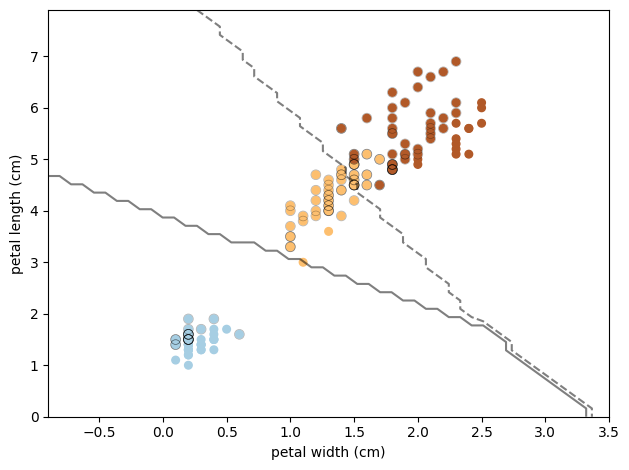

In [21]:
decision_function = ir_svm.decision_function(ir_wd_len_x)
support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)[0]
support_vectors = ir_wd_len_x.iloc[support_vector_indices]
plt.scatter(ir_wd_len_x.iloc[:, 0], ir_wd_len_x.iloc[:, 1], c=ir_target, s=30, cmap=plt.cm.Paired)
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    ir_svm,
    ir_wd_len_x,
    ax=ax,
    grid_resolution=50,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
)
plt.scatter(
    support_vectors.iloc[:, 0],
    support_vectors.iloc[:, 1],
    s=50,
    linewidth=0.5,
    facecolors="none",
    edgecolors="k",
    alpha=0.3
)
plt.tight_layout()
plt.show()

In [22]:
ir_svm_scaled_2 = Pipeline([
    ("scaler", StandardScaler()),
    ("classifier", LinearSVC(loss="hinge"))
])

search_ir = RandomizedSearchCV(
    estimator=ir_svm_scaled_2,
    param_distributions=param_grid,
    scoring="accuracy",
    cv=5,
    random_state=42
)
search_ir.fit(ir_wd_len_x, ir_target)
print(search_ir.best_params_, search_ir.best_score_)


c:\Users\User\OneDrive\Dokumenty\Machine-Learning\venv\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\User\OneDrive\Dokumenty\Machine-Learning\venv\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\User\OneDrive\Dokumenty\Machine-Learning\venv\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\User\OneDrive\Dokumenty\Machine-Learning\venv\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\User\OneDrive\Dokumenty\Machine-Learning\venv\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warni

{'classifier__max_iter': 5000, 'classifier__C': 100} 0.9666666666666668


In [23]:
ir_svm_scaled = Pipeline( [ 
    ("scaler" , StandardScaler()),
    ("classifier" , LinearSVC(loss='hinge', C=100, max_iter=5000)),
])

ir_svm_scaled.fit(ir_wd_len_train, ir_train_y)

ir_svm_train_acc = ir_svm.score(ir_wd_len_train, ir_train_y)
ir_svm_test_acc = ir_svm.score(ir_wd_len_test, ir_test_y)
ir_svm_scaled_train_acc = ir_svm_scaled.score(ir_wd_len_train, ir_train_y)
ir_svm_scaled_test_acc = ir_svm_scaled.score(ir_wd_len_test, ir_test_y)

ir_acc_list = [ir_svm_train_acc, ir_svm_test_acc, ir_svm_scaled_train_acc, ir_svm_scaled_test_acc]
print(ir_acc_list)

file_name = "iris_acc.pkl"

with open (file_name, "wb") as file:
    pickle.dump(ir_acc_list, file)


[0.9333333333333333, 0.9666666666666667, 0.95, 0.9666666666666667]


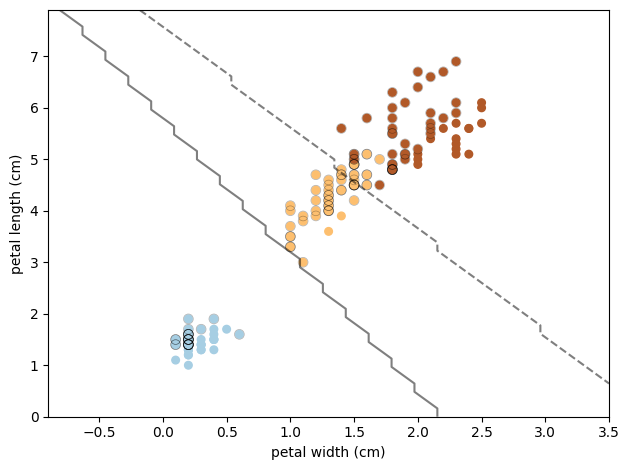

In [24]:
decision_function = ir_svm_scaled.decision_function(ir_wd_len_x)
support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)[0]
support_vectors = ir_wd_len_x.iloc[support_vector_indices]
plt.scatter(ir_wd_len_x.iloc[:, 0], ir_wd_len_x.iloc[:, 1], c=ir_target, s=30, cmap=plt.cm.Paired)
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    ir_svm_scaled,
    ir_wd_len_x,
    ax=ax,
    grid_resolution=50,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
)
plt.scatter(
    support_vectors.iloc[:, 0],
    support_vectors.iloc[:, 1],
    s=50,
    linewidth=0.5,
    facecolors="none",
    edgecolors="k",
    alpha=0.3
)
plt.tight_layout()
plt.show()

Zbiór do regresji:

<Axes: xlabel='x', ylabel='y'>

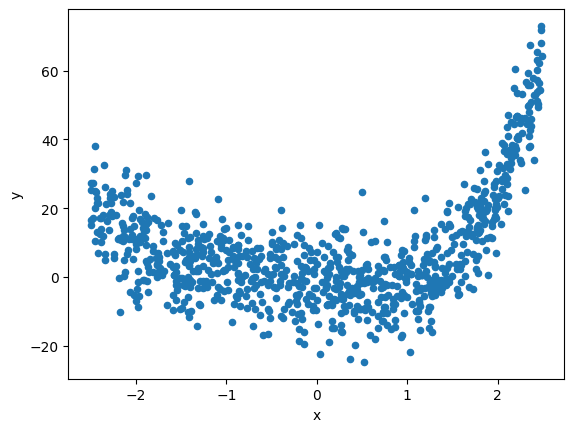

In [25]:
size = 900
X = np.random.rand(size)*5-2.5
w4, w3, w2, w1, w0 = 1, 2, 1, -4, 2
y = w4*(X**4) + w3*(X**3) + w2*(X**2) + w1*X + w0 + np.random.randn(size)*8-4
df = pd.DataFrame({'x': X, 'y': y})
df.plot.scatter(x='x',y='y')

Podział na zbiory testowy i uczący:

In [26]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)
print(len(train_X), len(train_y), len(test_X), len(test_y))

720 720 180 180


In [27]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import LinearSVR

svm_2 = Pipeline ([ 
    ("poly", PolynomialFeatures(degree=4, include_bias=True)),
    ("regressor", LinearSVR())
])

param_grid = {
    "regressor__C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "regressor__max_iter": [1000, 5000, 10000]
}

search_2 = RandomizedSearchCV(
    estimator=svm_2,
    param_distributions=param_grid,
    scoring="neg_mean_squared_error",
    cv=5,
    random_state=42
)

search_2.fit(X.reshape(-1, 1), y)
print(search_2.best_params_, search_ir.best_score_)


c:\Users\User\OneDrive\Dokumenty\Machine-Learning\venv\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\User\OneDrive\Dokumenty\Machine-Learning\venv\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\User\OneDrive\Dokumenty\Machine-Learning\venv\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\User\OneDrive\Dokumenty\Machine-Learning\venv\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\User\OneDrive\Dokumenty\Machine-Learning\venv\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warni

{'regressor__max_iter': 10000, 'regressor__C': 1} 0.9666666666666668


c:\Users\User\OneDrive\Dokumenty\Machine-Learning\venv\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\User\OneDrive\Dokumenty\Machine-Learning\venv\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\User\OneDrive\Dokumenty\Machine-Learning\venv\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [28]:

svm = Pipeline ([ 
    ("poly", PolynomialFeatures(degree=4, include_bias=True)),
    ("regressor", LinearSVR(C=10, epsilon=0.01, max_iter=5000))
])

print(train_X.shape, train_y.shape)

svm.fit(train_X.reshape(-1, 1), train_y)

(720,) (720,)


c:\Users\User\OneDrive\Dokumenty\Machine-Learning\venv\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly', PolynomialFeatures(degree=4)),
                ('regressor', LinearSVR(C=10, epsilon=0.01, max_iter=5000))])

Obliczenie MSE:

In [29]:
from sklearn.metrics import mean_squared_error

mse_list = []

y_predicted_train = svm.predict(train_X.reshape(-1,1))
mse_train = mean_squared_error(train_y, y_predicted_train)
mse_list.append(mse_train)

y_predicted_test = svm.predict(test_X.reshape(-1,1))
mse_test = mean_squared_error(test_y, y_predicted_test)
mse_list.append(mse_test)
print(mse_list)

[63.53844814014315, 69.40047470663741]


SVR:

In [30]:
from sklearn.svm import SVR

svr = Pipeline([
    ("regressor", SVR(kernel='poly', degree=4))
])

svr.fit(train_X.reshape(-1,1), train_y)

y_predicted_train_svr = svr.predict(train_X.reshape(-1,1))
mse_train_svr = mean_squared_error(train_y, y_predicted_train_svr)

y_predicted_test_svr = svr.predict(test_X.reshape(-1,1))
mse_test_svr = mean_squared_error(test_y, y_predicted_test_svr)
print(mse_train_svr, mse_test_svr)

110.12909757599547 108.20301642950496


Zastosowanie GridSearch:

In [31]:
from sklearn.model_selection import GridSearchCV

gs = GridSearchCV(svr, param_grid={ "regressor__C" : [0.1, 1, 10], "regressor__coef0" : [0.1, 1, 10], "regressor__epsilon": [0.001, 0.01, 0.1, 0.2]}, scoring='neg_mean_squared_error')

gs.fit(X.reshape(-1,1), y)

print(gs.best_params_, gs.best_score_)

{'regressor__C': 1, 'regressor__coef0': 1, 'regressor__epsilon': 0.1} -65.05835903743447


In [32]:
svr_2 = Pipeline([
    ("scaler", StandardScaler()),
    ("regressor", SVR(kernel='poly', degree=4))
])

param_grid = {
    "regressor__C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "regressor__epsilon": [0.001, 0.01, 0.1, 0.2],
    "regressor__coef0" : [0.01, 0.1, 1, 10, 100]
}

search_svr = RandomizedSearchCV(
    estimator=svr_2,
    param_distributions=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    random_state=42
)

search_svr.fit(X.reshape(-1, 1), y)
print(search_svr.best_params_, search_svr.best_score_)


{'regressor__epsilon': 0.01, 'regressor__coef0': 1, 'regressor__C': 1} -65.07299201938271


SVR jeszcze raz ale z parametrami:

In [33]:
svr_param = Pipeline([
    ("scaler", StandardScaler()),
    ("svr", SVR(kernel='poly', degree=4, C=10, coef0=1, epsilon=0.2))
])

svr_param.fit(train_X.reshape(-1,1), train_y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svr',
                 SVR(C=10, coef0=1, degree=4, epsilon=0.2, kernel='poly'))])

In [34]:
y_predicted_train_svr_param = svr_param.predict(train_X.reshape(-1,1))
mse_train_svr_param = mean_squared_error(train_y, y_predicted_train_svr_param)
mse_list.append(mse_train_svr_param)

y_predicted_test_svr_param = svr_param.predict(test_X.reshape(-1,1))
mse_test_svr_param = mean_squared_error(test_y, y_predicted_test_svr_param)
mse_list.append(mse_test_svr_param)

print(mse_list)

[63.53844814014315, 69.40047470663741, 63.37591089418427, 69.46098563811847]


Zapis MSE:

In [35]:
with open("reg_mse.pkl", "wb") as file:
    pickle.dump(mse_list, file)